In [26]:
from datap_pipe import *
import sys
import matplotlib.pyplot as plt

In [15]:
dummy_x = 1
dummy_y = 1
t0 =-0.5
t1=0.5
chan = ['C3','Fp1']
n_c=6
f_int=0.5
stage = preprocessing_pipeline( t0=t0, t1=t1, transformation_type='CWT', filter_channels=chan,
                               transformation_parameters={'cwt__n_c': n_c, 'cwt__f_int':f_int}).pipeline()
X_pipe, y_pipe= stage.fit_transform(dummy_x,dummy_y)
# print(X)
# print(y)


 initialize extraction

 CWT trasnsformation initialized....
Trying to build pipeline
Importing data...



  1%|█                                                                            | 196/13609 [00:00<00:13, 968.61it/s]

Converting to matrix... 



  0%|                                                                                | 5/13609 [00:00<04:40, 48.54it/s]

Resulting X matrix shape (13609, 2, 200)

Extract Transform invoqued 


100%|████████████████████████████████████████████████████████████████████████████| 13609/13609 [04:45<00:00, 47.61it/s]

CWT finished
Transformation transform invoqued


In [16]:
sys.getsizeof(X_pipe)

424600960

In [17]:
X_pipe.shape

(13609, 2, 39, 200)

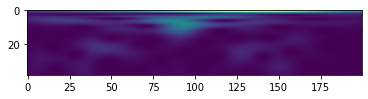

In [19]:
plt.imshow(X_pipe[0,1])

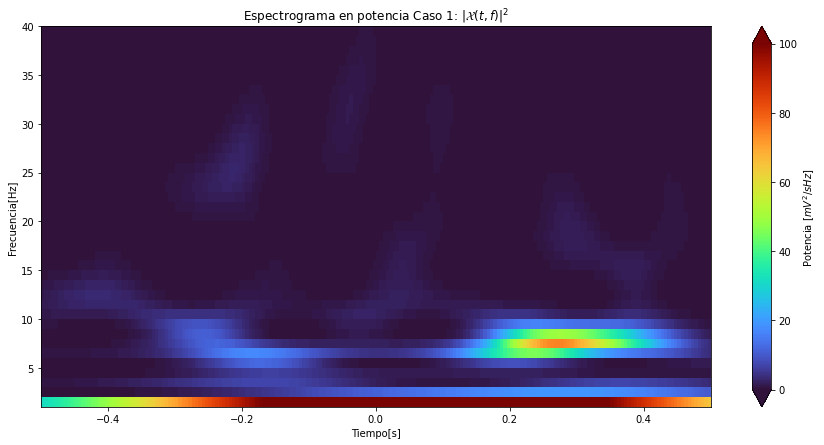

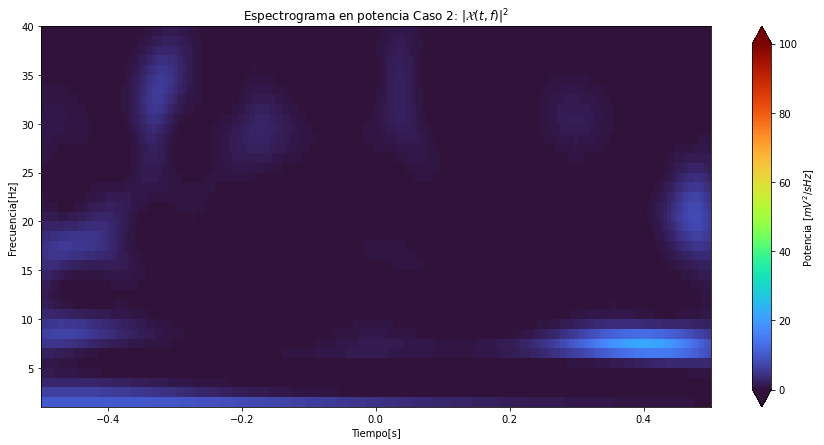

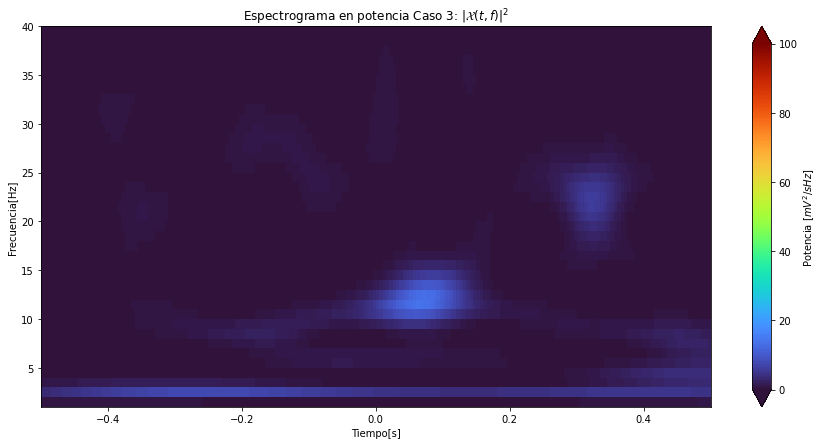

In [36]:
for i in range(1,4):
    plt.figure(figsize=(15,7)) #Declaramos el espacio de figura para graficar
    spectro = X_pipe[y_pipe==i][1,1]
    #Utilizamos la función imshow para graficar las intensidades de los valores de la matriz
    plt.imshow(abs(spectro)**2,extent=[-0.5,0.5,40,1],aspect='auto',cmap='turbo') 
    plt.colorbar(extend='both',label=r'Potencia $[mV^2/sHz]$')
    plt.clim(0, 100);
    plt.gca().invert_yaxis() #Acomodamos y etiquetamos los ejes
    plt.xlabel('Tiempo[s]')
    plt.ylabel('Frecuencia[Hz]')
    plt.title(f'Espectrograma en potencia Caso {i}: '+r'$|\mathcal{X}(t,f)|^2$')
    plt.show()

In [3]:
data = EEGProcess().extraction((2,22),(20,37),(38,60),t0,t1, [1,2,3])

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:09<00:00,  1.55it/s]


In [19]:
dummy_x = 1
dummy_y = 1
t0 =-0.5
t1=1
chan = ['C3','Fp1']
n_c=6
f_int=0.5
data.columns

Index(['Control', 'Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
       'A1', 'A2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'X5'],
      dtype='object')

In [31]:
X = data.drop(columns = ['Control','X5'])
y = data['Control']
X_copy = X.copy()
for key in X.columns:
    X_copy[key] = X[key].apply(lambda x: len(x))
est_len = int((t1- t0)*200)
X.drop(X_copy[X_copy['O1']!=est_len].index, inplace=True)
y.drop(X_copy[X_copy['O1']!=est_len].index, inplace=True)

In [32]:
chan = X.columns
df_mat = np.zeros([X.values.shape[0],len(chan),est_len])
X = X[chan]
for i in tqdm(range(X.values.shape[0])):
    for j in range(len(chan)):
        for k in range(est_len):
            df_mat[i][j][k] =  X.values[i][j][k]

100%|████████████████████████████████████████████████████████████████████████████| 13606/13606 [04:12<00:00, 53.99it/s]


In [33]:
df_mat.shape

(13606, 21, 300)

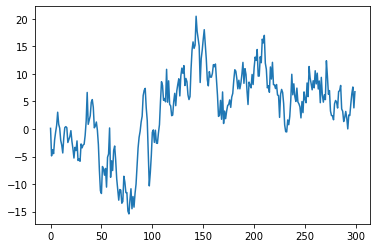

In [34]:
plt.plot(df_mat[0,1])

In [35]:
ff,fi=40,1
k = int((40-1)/0.5)
X = df_mat
n = X.shape[2]
print([X.shape[0],X.shape[1],k,n])
X_fit = np.zeros([X.shape[0],X.shape[1],k,n],dtype=np.float16)
n_i = n_c-2
n_f = n_c+2
for i in tqdm(range(X.shape[0])):
    for j in range(X.shape[1]):
        channel_signal = X[i,j]
        spect = MRA(channel_signal, fi,ff,f_int, n_i,n_f)
        for k_ in range(k):
            for n_ in range(n):
                X_fit[i,j,k_,n_] = spect[k_,n_]

[13606, 21, 78, 300]


100%|██████████████████████████████████████████████████████████████████████████| 13606/13606 [2:03:32<00:00,  1.84it/s]


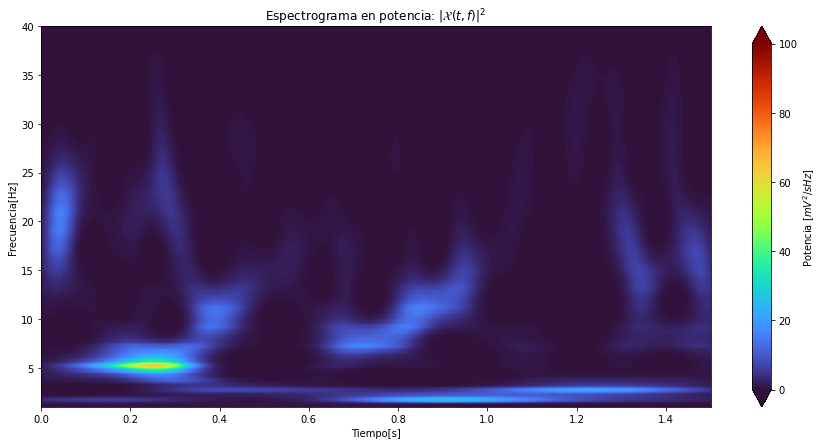

In [47]:
plt.figure(figsize=(15,7)) #Declaramos el espacio de figura para graficar
spectro = X_fit[0,2]
#Utilizamos la función imshow para graficar las intensidades de los valores de la matriz
plt.imshow(abs(spectro)**2,extent=[0,1.5,40,1],aspect='auto',cmap='turbo') 
plt.colorbar(extend='both',label=r'Potencia $[mV^2/sHz]$')
plt.clim(0, 100);
plt.gca().invert_yaxis() #Acomodamos y etiquetamos los ejes
plt.xlabel('Tiempo[s]')
plt.ylabel('Frecuencia[Hz]')
plt.title(r'Espectrograma en potencia: $|\mathcal{X}(t,f)|^2$')
plt.show()

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM, BatchNormalization,Activation, Conv2D, Conv3D, MaxPooling2D, MaxPooling3D

In [20]:
from tensorflow.python.client import device_lib

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
device_lib.list_local_devices()

Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 146141443371589389
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5762973696
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4179103979739836503
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [21]:
y_pipe

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split
y_res = tf.keras.utils.to_categorical(y_pipe-1)
X_train,X_test,y_train,y_test = train_test_split(X_pipe,y_res,test_size=0.3, stratify=y_res, random_state=42)

In [23]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (9524, 3, 78, 300)
y train shape: (9524, 3)
X test shape: (4082, 3, 78, 300)
y test shape: (4082, 3)


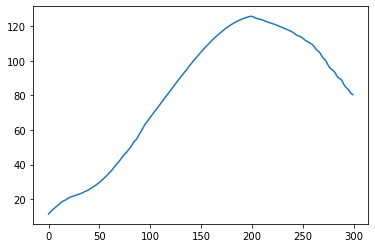

In [30]:
#Before Scaling
plt.plot(X_train[0,0,0])

In [31]:
X_train.shape[1:]

(3, 78, 300)

In [34]:
import keras

In [62]:
def architecture (input_shape, num_classes,activation, dropout,batch_normalization,dropout_rate):
    model = Sequential()
    #Convolution
    model.add(Conv2D(32, 7, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())

    model.add(Conv2D(32, 3, padding='valid', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    
    model.add(Conv2D(32, 3, padding='same', input_shape=(3,0.5*(200-2),1)))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())
        
    model.add(Conv2D(32, 3, padding='valid', input_shape=(3,0.5*(200-2),1)))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization()) 
    
    #Dense
    model.add(tf.keras.layers.Flatten())
    model.add(Dense(100,kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))
    if batch_normalization:
        model.add(BatchNormalization())
    if dropout:
        model.add(Dropout(dropout_rate))
    model.add(Dense(100, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation('tanh'))
    if batch_normalization:
        model.add(BatchNormalization())
    if dropout:
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(num_classes,kernel_regularizer=keras.regularizers.l2(l=0.01)))
    model.add(Activation('softmax',name='CNN_EEGModel'))
    return model

In [63]:
one_image = X_train.shape[1:]
activation='sigmoid'
num_classes=3
dropout=True
batch_normalization=True

model = architecture(one_image,num_classes,activation,dropout,batch_normalization,dropout_rate=0.2)

In [64]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 3, 78, 32)         470432    
                                                                 
 batch_normalization_19 (Bat  (None, 3, 78, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 76, 32)         9248      
                                                                 
 batch_normalization_20 (Bat  (None, 1, 76, 32)        128       
 chNormalization)                                                
                                                                 
 batch_normalization_21 (Bat  (None, 1, 76, 32)        128       
 chNormalization)                                                
                                                     

In [65]:
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

C:\Users\Andrew S\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=opt,
             metrics=['accuracy'])
num_epochs = 10
validation_portion = 0.3
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs = num_epochs, batch_size = 64, \
                            validation_split = validation_portion, shuffle=True, verbose=1)

Epoch 1/10


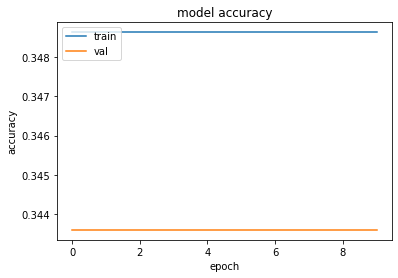

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()